Description from the authors:
"We have created a 17 category flower dataset with 80 images for each class. The flowers chosen are some common flowers in the UK. The images have large scale, pose and light variations and there are also classes with large variations of images within the class and close similarity to other classes".

Link: http://www.robots.ox.ac.uk/~vgg/data/flowers/17/

In [2]:
import pandas as pd
import numpy  as np
import cv2
import os
import matplotlib.pyplot as plt

In [5]:
flower_names=[chr(i) for i in range(65,65+17)]
flower_names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q']

In [6]:
flower_path=os.listdir("jpg")
flower_path

['files.txt', 'files.txt~']

In [7]:
flower_path=flower_path[2:]
flower_path.sort()


In [8]:
flower_path

[]

In [9]:
i=0
j=80
if not os.path.exists("flower"):
        os.makedirs("flower")
else:
     print("flower created!")
for k in flower_names:
    path=f"flower/{k}"
    if not os.path.exists(path):
        os.makedirs(path)
        flowerss = flower_path[i:j]
        for idx,f in enumerate(flowerss,start=1):
            os.rename(f"jpg/{f}", f"flower/{k}/{idx}.jpg")
    
        i=i+80
        j=j+80
    else:
        print(f"{k} dir created!")

flower created!
A dir created!
B dir created!
C dir created!
D dir created!
E dir created!
F dir created!
G dir created!
H dir created!
I dir created!
J dir created!
K dir created!
L dir created!
M dir created!
N dir created!
O dir created!
P dir created!
Q dir created!


In [3]:
name = cv2.imread("flower/A/55.jpg")
nameRGB=cv2.cvtColor(name,cv2.COLOR_BGR2RGB)
cv2.imshow("image",nameRGB)
cv2.waitKey(3000)
cv2.destroyAllWindows()

In [ ]:
name.shape

(500, 747, 3)

(array([4., 1., 0., 0., 0., 1., 1., 0., 0., 1.]),
 array([ 94.        , 152.19999695, 210.3999939 , 268.6000061 ,
        326.79998779, 385.        , 443.20001221, 501.3999939 ,
        559.59997559, 617.79998779, 676.        ]),
 <BarContainer object of 10 artists>)

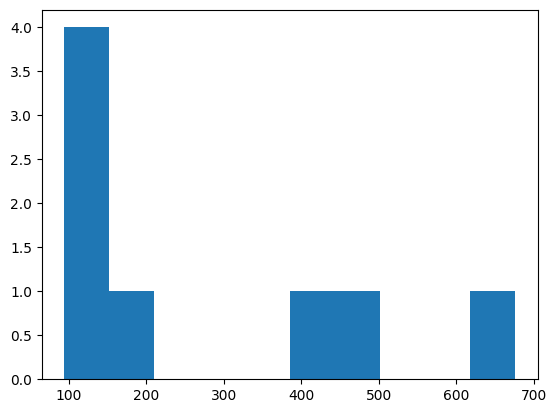

In [ ]:
z=cv2.calcHist(nameRGB,[0],None,[8,],[0,255,])
plt.hist(z)

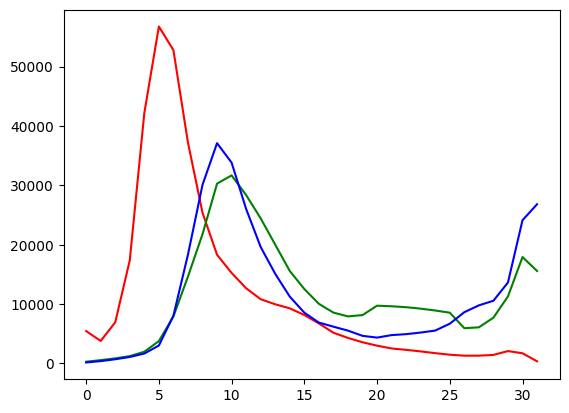

In [ ]:
for idx , c in enumerate(["r","g","b"]):
    z=cv2.calcHist([name],[idx],None,[32],[0,255])
    plt.plot(z,color=c)

In [ ]:
res=cv2.calcHist(nameRGB,[0,1,2],None,[32,32,32],[0,255,0,255,0,255])
print(len(res), res.shape)


32 (32, 32, 32)


In [ ]:
gray = cv2.cvtColor(name,cv2.COLOR_RGBA2GRAY)
x= cv2.HuMoments(cv2.moments(gray))
x

array([[ 1.44325027e-03],
       [ 2.87293784e-07],
       [ 4.95198102e-15],
       [ 5.05575394e-13],
       [-2.41092189e-26],
       [ 1.86660798e-16],
       [-7.66041011e-27]])

کتابخانه h5py برای ذخیره دیتافریم ها کاربرد دارد پس از آماده سازی دیتا با این کتابخانه دیتافریم را سیو میکنیم تا هر بار مجبور به اجرا و پیش پردازش نکنیم.



 کلاس تا اینجا گفته شد.


In [11]:
data = []
for j in range (65,65+12):
    flowername=chr(j)
    label = j - 65 
    print(label)
    for i in range(1,80):
        img = cv2.imread(f"flower/{flowername}/{i}.jpg")
        resized = cv2.resize(img, (412,412))
        pixels=resized.flatten()
        gray = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
        humoments = cv2.HuMoments(cv2.moments(gray))
        humomentsflat = humoments.flatten()

        
        
        fullfeature =np.concatenate((pixels,humomentsflat,[label]))

        data.append(fullfeature)
        
dataset = pd.DataFrame(data)

0
1
2
3
4
5
6
7
8
9
10
11


In [12]:
dataset.shape

(948, 509240)

SVM


In [13]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values 

In [15]:
lab = set(y)
len(lab)

12

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [17]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [18]:
model.score(X_test, y_test)

0.5263157894736842

In [19]:
y_svmc =model.predict(X_test)

report= classification_report(y_test,y_svmc)
print(report)

              precision    recall  f1-score   support

         0.0       0.40      0.57      0.47         7
         1.0       0.36      0.67      0.47         6
         2.0       0.38      0.83      0.53         6
         3.0       0.40      0.44      0.42         9
         4.0       0.43      0.33      0.38         9
         5.0       1.00      0.45      0.62        11
         6.0       1.00      0.57      0.73         7
         7.0       0.75      0.27      0.40        11
         8.0       0.14      0.20      0.17         5
         9.0       0.80      1.00      0.89         4
        10.0       0.78      0.64      0.70        11
        11.0       0.60      0.67      0.63         9

    accuracy                           0.53        95
   macro avg       0.59      0.55      0.53        95
weighted avg       0.62      0.53      0.53        95



In [20]:
confusion_matrix(y_test,y_svmc)

array([[4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2],
       [0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 4, 1, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 1, 1, 5, 0, 0, 2, 0, 0, 2],
       [1, 1, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [4, 0, 3, 1, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
       [0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 7, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6]])

<Header> AdaBoost <Header>

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [22]:
model_ada = DecisionTreeClassifier(max_depth=1)

model_a = AdaBoostClassifier(estimator=model_ada, n_estimators=750, learning_rate=0.5)

model_a.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=750)

In [23]:
y_pred = model_a.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(acc)

0.29473684210526313
